In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#def warn(*args, **kwargs): pass
#import warnings
#warnings.warn = warn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing

In [3]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/gender_submission.csv')
print(train_data.shape, test_data.shape)
train_data.head()

(891, 12) (418, 11)


PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [4]:
emb = pd.get_dummies(train_data['Embarked'], drop_first = True)
sex = pd.get_dummies(train_data['Sex'], drop_first = True)

In [5]:
train_data = pd.concat([train_data, sex, emb], axis = 1)

In [6]:
train_data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)

In [7]:
# block 1 - simple stats
mean1 = train_data['Age'].mean()
sum1 = train_data['Age'].sum()
max1 = train_data['Age'].max()
min1 = train_data['Age'].min()
count1 = train_data['Age'].count()
median1 = train_data['Age'].median() 
std1 = train_data['Age'].std() 
var1 = train_data['Age'].var()  
mode = train_data['Age'].mode()  
# block 2 - group by
groupby_sum1 = train_data.groupby(['Age']).sum() 
groupby_count1 = train_data.groupby(['Age']).count()

In [8]:
print('Statistical value','\n','Mean: ',mean1,'\n','Sum: ',sum1,'\n','Max: ',max1,'\n','Min: ',min1,'\n','Count: ',count1,'Median: ',median1,'\n','STD: ',std1,'\n','Var: ',var1,'\n','Mode: ',mode,'\n')

Statistical value 
 Mean:  29.69911764705882 
 Sum:  21205.17 
 Max:  80.0 
 Min:  0.42 
 Count:  714 Median:  28.0 
 STD:  14.526497332334044 
 Var:  211.0191247463081 
 Mode:  0    24.0
dtype: float64 



In [9]:
train_data.isnull()

Survived  Pclass    Age  SibSp  Parch   Fare   male      Q      S
0       False   False  False  False  False  False  False  False  False
1       False   False  False  False  False  False  False  False  False
2       False   False  False  False  False  False  False  False  False
3       False   False  False  False  False  False  False  False  False
4       False   False  False  False  False  False  False  False  False
..        ...     ...    ...    ...    ...    ...    ...    ...    ...
886     False   False  False  False  False  False  False  False  False
887     False   False  False  False  False  False  False  False  False
888     False   False   True  False  False  False  False  False  False
889     False   False  False  False  False  False  False  False  False
890     False   False  False  False  False  False  False  False  False

[891 rows x 9 columns]

In [10]:
train_data.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
male          0
Q             0
S             0
dtype: int64

In [11]:
print('Groupby value','\n',groupby_sum1,groupby_count1)

Groupby value 
        Survived  Pclass  SibSp  Parch      Fare  male  Q  S
Age                                                        
0.42          1       3      0      1    8.5167     1  0  0
0.67          1       2      1      1   14.5000     1  0  1
0.75          2       6      4      2   38.5166     0  0  0
0.83          2       4      1      3   47.7500     2  0  2
0.92          1       1      1      2  151.5500     1  0  1
...         ...     ...    ...    ...       ...   ... .. ..
70.00         0       3      1      1   81.5000     2  0  2
70.50         0       3      0      0    7.7500     1  1  0
71.00         0       2      0      0   84.1584     2  0  0
74.00         0       3      0      0    7.7750     1  0  1
80.00         1       1      0      0   30.0000     1  0  1

[88 rows x 8 columns]        Survived  Pclass  SibSp  Parch  Fare  male  Q  S
Age                                                    
0.42          1       1      1      1     1     1  1  1
0.67         

In [12]:
temp_data = train_data

In [13]:
train_data["Age"].fillna(mean1, inplace = True)
train_x1 = train_data

In [14]:
train_data = temp_data

In [15]:
train_data["Age"].fillna(mode[0], inplace = True)
train_x2 = train_data

In [16]:
train_x2.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

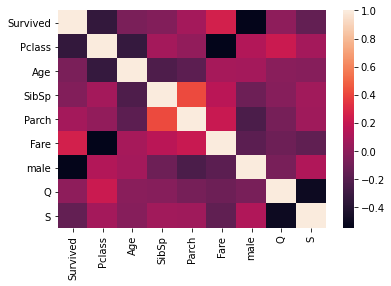

In [17]:
corr = train_x1.corr()
sns.heatmap(corr)

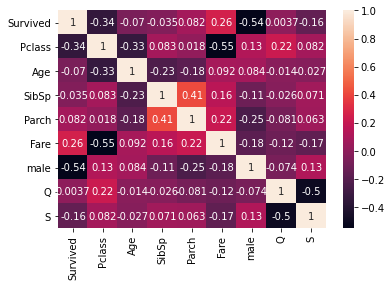

In [18]:
corr = train_x1.corr()
sns.heatmap(corr, annot=True)

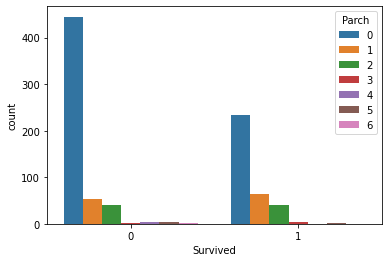

In [ ]:
sns.countplot(x = 'Survived', hue = 'Parch', data = train_x1)

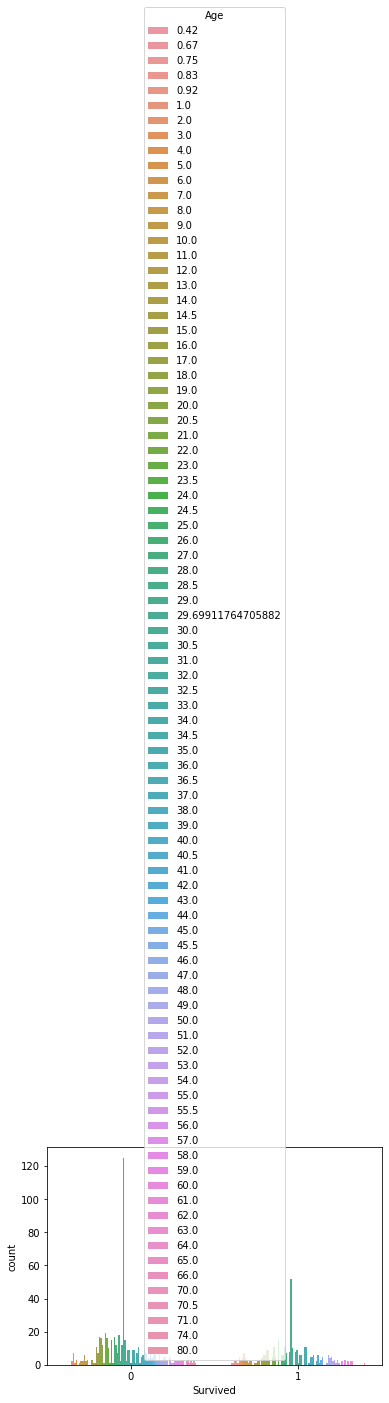

In [ ]:
sns.countplot(x = 'Survived', hue = 'Age', data = train_x1)

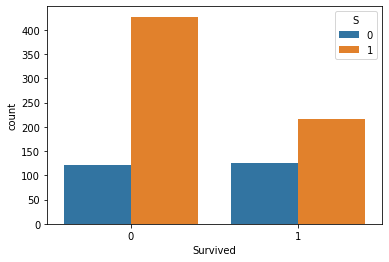

In [ ]:
sns.countplot(x = 'Survived', hue = 'S', data = train_x1)

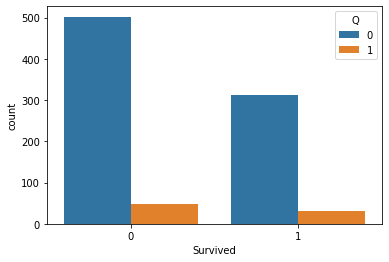

In [ ]:
sns.countplot(x = 'Survived', hue = 'Q', data = train_x1)

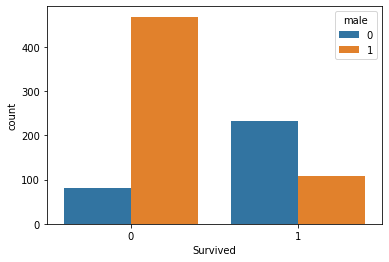

In [ ]:
sns.countplot(x = 'Survived', hue = 'male', data = train_x1)

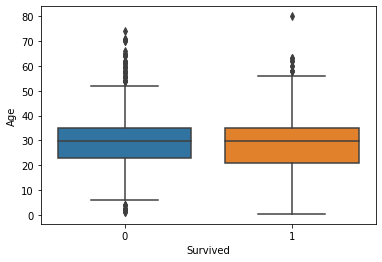

In [ ]:
sns.boxplot(x = 'Survived', y = 'Age', data = train_x1)

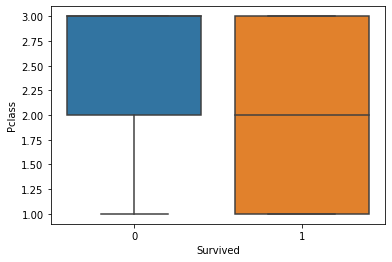

In [ ]:
sns.boxplot(x = 'Survived', y = 'Pclass', data = train_x1)

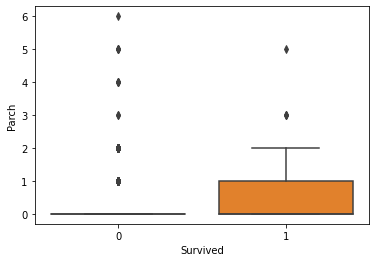

In [ ]:
sns.boxplot(x = 'Survived', y = 'Parch', data = train_x1)

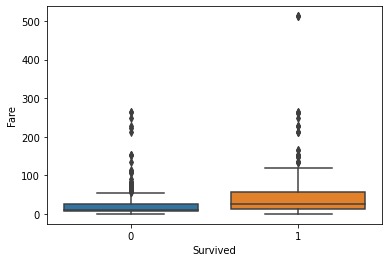

In [ ]:
sns.boxplot(x = 'Survived', y = 'Fare', data = train_x1)

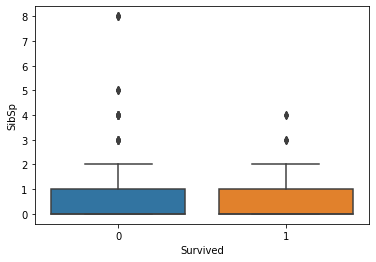

In [ ]:
sns.boxplot(x = 'Survived', y = 'SibSp', data = train_x1)

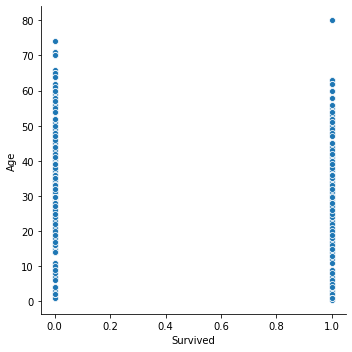

In [ ]:
sns.relplot(x="Survived", y="Age", data=train_x1)

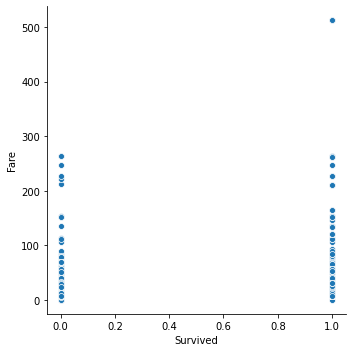

In [ ]:
sns.relplot(x="Survived", y="Fare", data=train_x1)

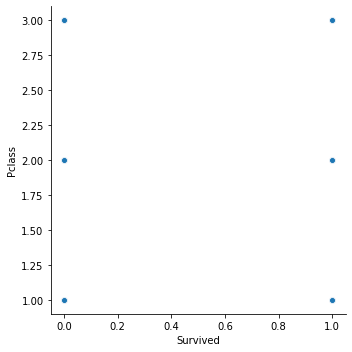

In [ ]:
sns.relplot(x="Survived", y="Pclass", data=train_x1)

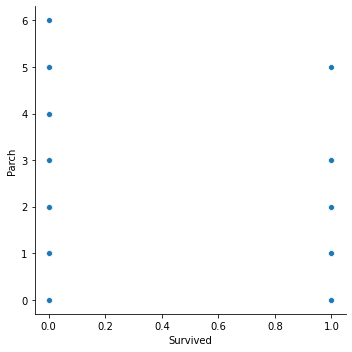

In [ ]:
sns.relplot(x="Survived", y="Parch", data=train_x1)

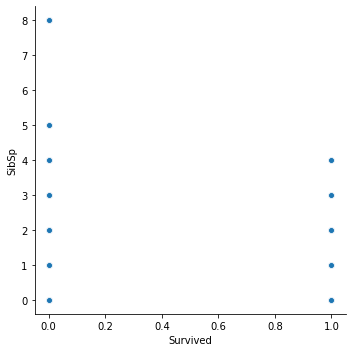

In [ ]:
sns.relplot(x="Survived", y="SibSp", data=train_x1)

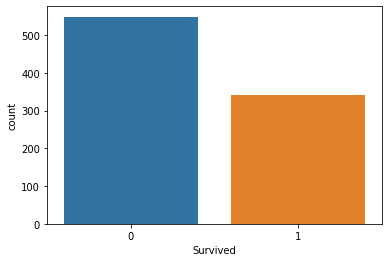

In [ ]:
sns.countplot(x = 'Survived', data = train_x1)

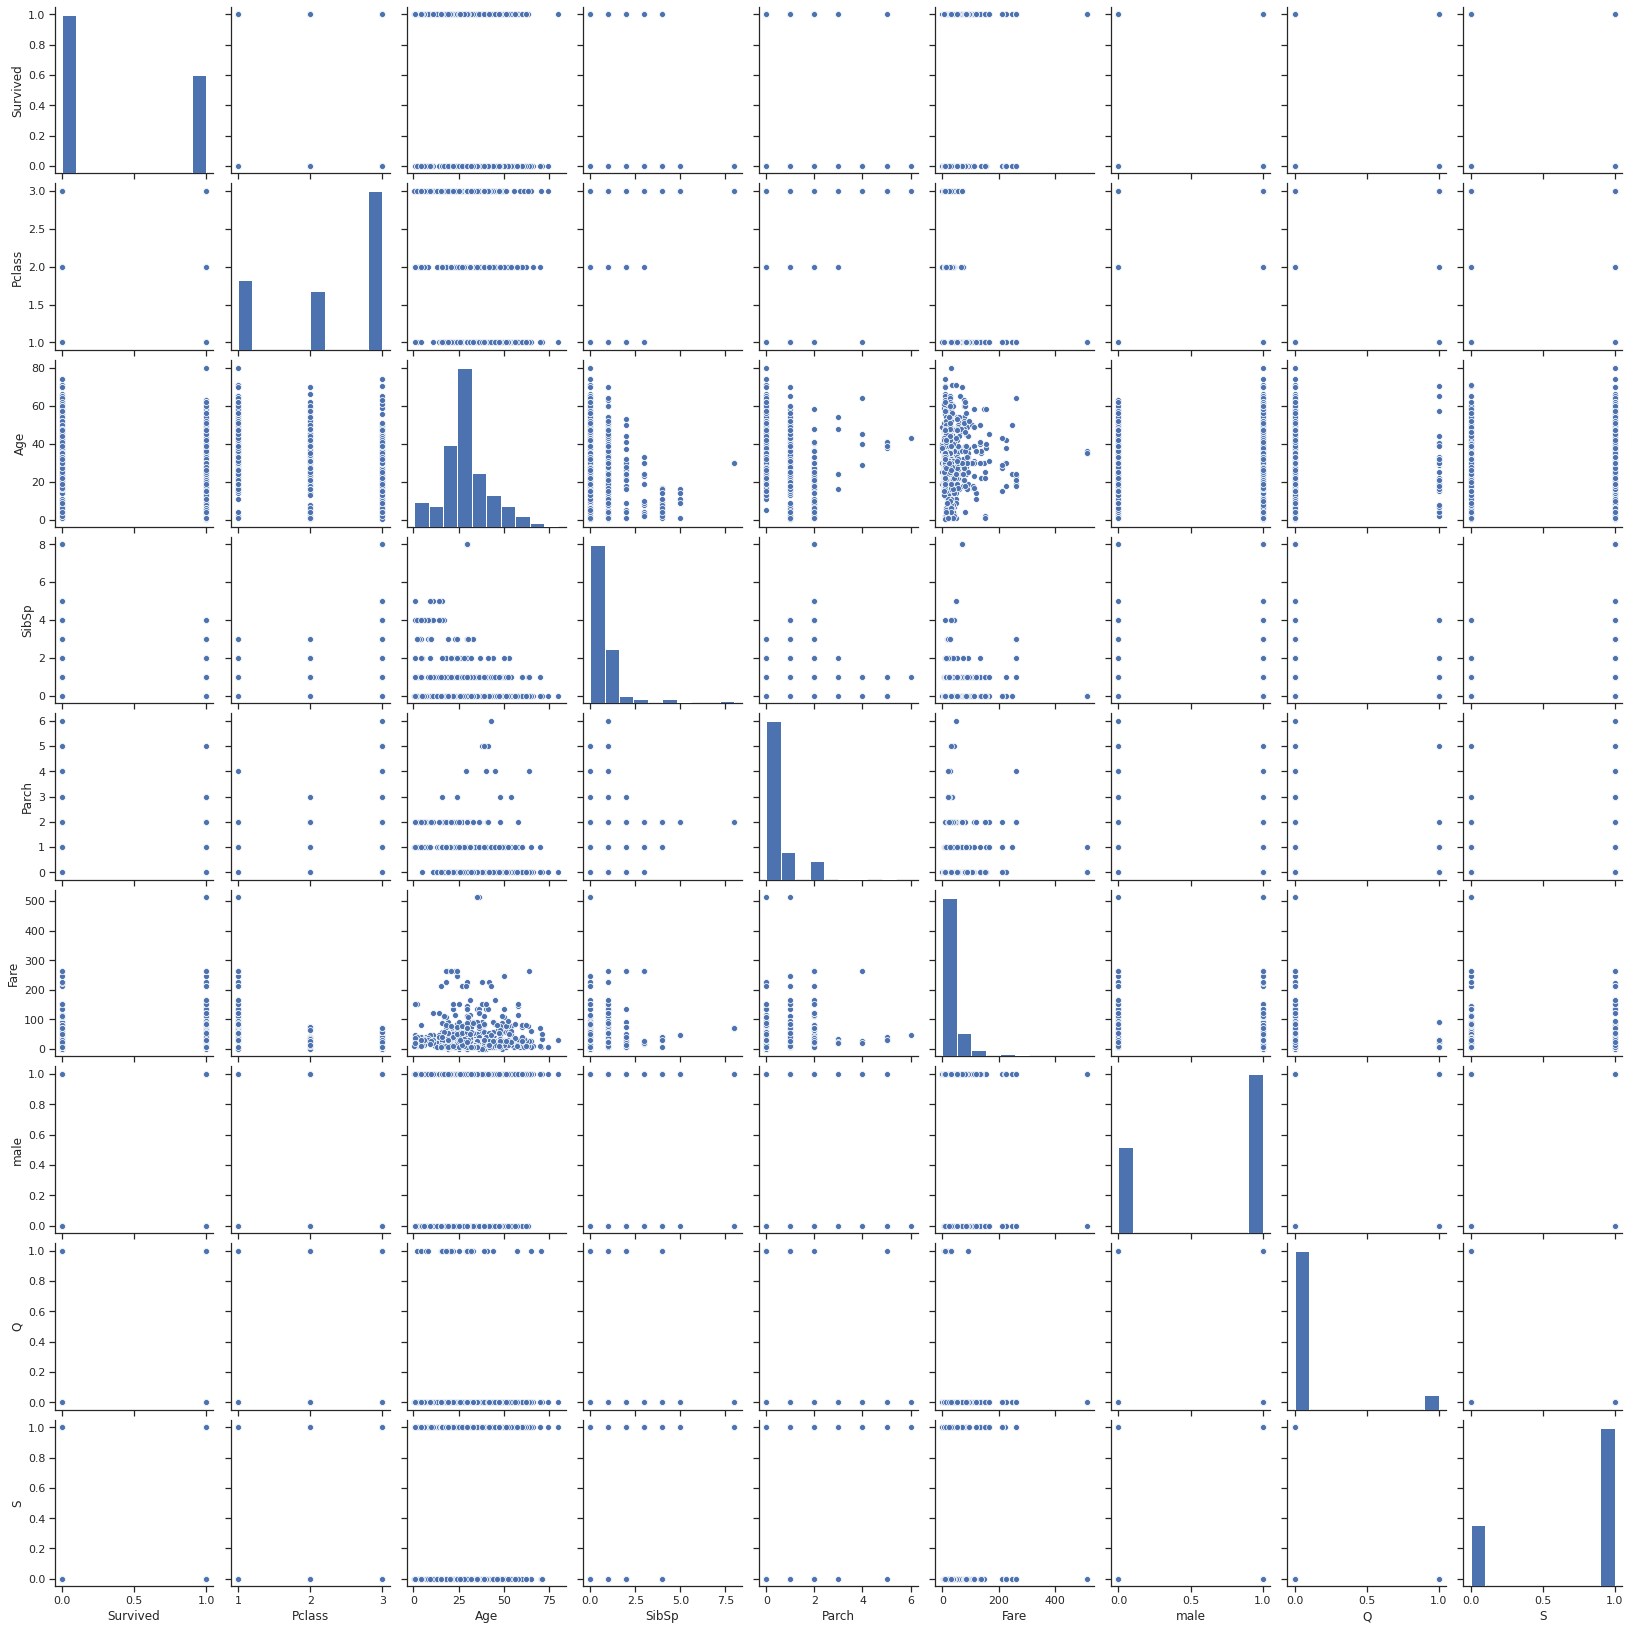

In [ ]:
sns.set(style="ticks", color_codes=True)    
g = sns.pairplot(train_x1)
plt.show()

In [19]:
x1 = train_x1.drop('Survived', axis = 1)
y1 = train_x1['Survived']

In [20]:
x2 = train_x2.drop('Survived', axis = 1)
y2 = train_x2['Survived']

In [39]:
x1

Pclass        Age  SibSp  Parch     Fare  male  Q  S
0         3  22.000000      1      0   7.2500     1  0  1
1         1  38.000000      1      0  71.2833     0  0  0
2         3  26.000000      0      0   7.9250     0  0  1
3         1  35.000000      1      0  53.1000     0  0  1
4         3  35.000000      0      0   8.0500     1  0  1
..      ...        ...    ...    ...      ...   ... .. ..
886       2  27.000000      0      0  13.0000     1  0  1
887       1  19.000000      0      0  30.0000     0  0  1
888       3  29.699118      1      2  23.4500     0  0  1
889       1  26.000000      0      0  30.0000     1  0  0
890       3  32.000000      0      0   7.7500     1  1  0

[891 rows x 8 columns]

In [21]:
x = x1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x1_train = min_max_scaler.fit_transform(x)
train_data1 = pd.DataFrame(x1_train)

In [22]:
x = x2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x2_train = min_max_scaler.fit_transform(x)
train_data2 = pd.DataFrame(x2_train)

In [38]:
train_data1

0         1      2         3         4    5    6    7
0    1.0  0.271174  0.125  0.000000  0.014151  1.0  0.0  1.0
1    0.0  0.472229  0.125  0.000000  0.139136  0.0  0.0  0.0
2    1.0  0.321438  0.000  0.000000  0.015469  0.0  0.0  1.0
3    0.0  0.434531  0.125  0.000000  0.103644  0.0  0.0  1.0
4    1.0  0.434531  0.000  0.000000  0.015713  1.0  0.0  1.0
..   ...       ...    ...       ...       ...  ...  ...  ...
886  0.5  0.334004  0.000  0.000000  0.025374  1.0  0.0  1.0
887  0.0  0.233476  0.000  0.000000  0.058556  0.0  0.0  1.0
888  1.0  0.367921  0.125  0.333333  0.045771  0.0  0.0  1.0
889  0.0  0.321438  0.000  0.000000  0.058556  1.0  0.0  0.0
890  1.0  0.396833  0.000  0.000000  0.015127  1.0  1.0  0.0

[891 rows x 8 columns]

In [ ]:
emb = pd.get_dummies(test_data['Embarked'], drop_first = True)
emb.head(5)

Q  S
0  1  0
1  0  1
2  1  0
3  0  1
4  0  1

In [ ]:
sex = pd.get_dummies(test_data['Sex'], drop_first = True)
sex.head(5)

male
0     1
1     0
2     1
3     1
4     0

In [23]:
test_data = pd.concat([test_data, sex, emb], axis = 1)

In [ ]:
test_data.head()

PassengerId  Pclass  ...  Q  S
0          892       3  ...  1  0
1          893       3  ...  0  1
2          894       2  ...  1  0
3          895       3  ...  0  1
4          896       3  ...  0  1

[5 rows x 14 columns]

In [24]:
test_data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket','Cabin'], axis = 1, inplace = True)

In [ ]:
test_data.head()

Pclass   Age  SibSp  Parch     Fare  male  Q  S
0       3  34.5      0      0   7.8292     1  1  0
1       3  47.0      1      0   7.0000     0  0  1
2       2  62.0      0      0   9.6875     1  1  0
3       3  27.0      0      0   8.6625     1  0  1
4       3  22.0      1      1  12.2875     0  0  1

In [ ]:
test_data.isnull()

Pclass    Age  SibSp  Parch   Fare   male      Q      S
0     False  False  False  False  False  False  False  False
1     False  False  False  False  False  False  False  False
2     False  False  False  False  False  False  False  False
3     False  False  False  False  False  False  False  False
4     False  False  False  False  False  False  False  False
..      ...    ...    ...    ...    ...    ...    ...    ...
413   False   True  False  False  False  False  False  False
414   False  False  False  False  False  False  False  False
415   False  False  False  False  False  False  False  False
416   False   True  False  False  False  False  False  False
417   False   True  False  False  False  False  False  False

[418 rows x 8 columns]

In [25]:
# block 1 - simple stats
mean1 = test_data['Age'].mean()
meanf = test_data['Fare'].mean()
sum1 = test_data['Age'].sum()
max1 = test_data['Age'].max()
min1 = test_data['Age'].min()
count1 = test_data['Age'].count()
median1 = test_data['Age'].median() 
std1 = test_data['Age'].std() 
var1 = test_data['Age'].var()  
mode = test_data['Age'].mode()  
# block 2 - group by
groupby_sum1 = test_data.groupby(['Age']).sum() 
groupby_count1 = test_data.groupby(['Age']).count()

In [26]:
print('Statical value','\n','Mean: ',mean1,'\n','Sum: ',sum1,'\n','Max: ',max1,'\n','Min: ',min1,'\n','Count: ',count1,'Median: ',median1,'\n','STD: ',std1,'\n','Var: ',var1,'\n','Mode: ',mode,'\n')


Statical value 
 Mean:  30.272590361445783 
 Sum:  10050.5 
 Max:  76.0 
 Min:  0.17 
 Count:  332 Median:  27.0 
 STD:  14.18120923562442 
 Var:  201.10669538455937 
 Mode:  0    21.0
1    24.0
dtype: float64 



In [27]:
print('Groupby value','\n',groupby_sum1,groupby_count1)

Groupby value 
        Pclass  SibSp  Parch      Fare  male  Q  S
Age                                              
0.17      3.0    1.0    2.0   20.5750     1  0  0
0.33      3.0    0.0    2.0   14.4000     1  0  1
0.75      3.0    1.0    1.0   13.7750     1  0  1
0.83      3.0    0.0    1.0    9.3500     0  0  0
0.92      2.0    1.0    2.0   27.7500     1  0  1
...       ...    ...    ...       ...   ... .. ..
62.00     2.0    0.0    0.0    9.6875     0  0  1
63.00     3.0    2.0    0.0  247.7792     1  0  1
64.00     3.0    2.0    3.0  184.9583     3  0  3
67.00     1.0    1.0    0.0  221.7792     1  0  1
76.00     1.0    1.0    0.0   78.8500     1  0  0

[79 rows x 7 columns]        Pclass  SibSp  Parch  Fare  male  Q  S
Age                                          
0.17        1      1      1     1     1  1  1
0.33        1      1      1     1     1  1  1
0.75        1      1      1     1     1  1  1
0.83        1      1      1     1     1  1  1
0.92        1      1      1     1  

In [28]:
temp_data = test_data

In [29]:
test_data["Age"].fillna(mean1, inplace = True)
test_data["Fare"].fillna(meanf, inplace = True)
test_x1 = test_data

In [30]:
test_data["Age"].fillna(mode[0], inplace = True)
test_data["Fare"].fillna(meanf, inplace = True)
test_x2 = test_data

In [31]:
test_x2.isnull().sum()

Pclass    473
Age         0
SibSp     473
Parch     473
Fare        0
male        0
Q           0
S           0
dtype: int64

In [32]:
x = test_x1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x1_test = min_max_scaler.fit_transform(x)
test_data1 = pd.DataFrame(x1_test)

In [33]:
x = test_x2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x2_test = min_max_scaler.fit_transform(x)
test_data2 = pd.DataFrame(x2_test)

In [ ]:
test_data2.shape

(418, 8)

In [ ]:
test_dataY.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [34]:
test_y1 = test_dataY.drop('PassengerId', axis = 1)

In [ ]:
test_y1.shape

(418, 1)

In [ ]:
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /titanic/gender_submission.csv')

In [ ]:
p_id = []
for i in test_dataY['PassengerId']:
  p_id.append(i)
len(p_id)

418

In [35]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),]

In [36]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_data1, y1, test_size=0.2, random_state=1)

In [43]:
for clf in classifiers:
    clf.fit(X_train,y_train)
    name = clf.__class__.__name__
    print('\n',name,':')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.3%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)


 LogisticRegression :
Accuracy: 78.212%
Log Loss: 0.4811055885502568

 KNeighborsClassifier :
Accuracy: 80.447%
Log Loss: 3.3216661532116736

 SVC :
Accuracy: 78.771%
Log Loss: 0.4912482977863691

 NuSVC :
Accuracy: 78.771%
Log Loss: 0.495060652528347

 DecisionTreeClassifier :
Accuracy: 77.095%
Log Loss: 7.733063039122956

 RandomForestClassifier :
Accuracy: 77.654%
Log Loss: 0.874327942417031

 GaussianNB :
Accuracy: 76.536%
Log Loss: 0.6662416363083544


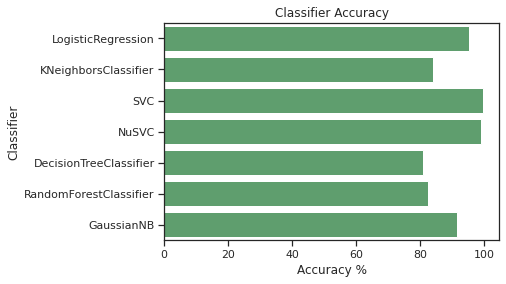

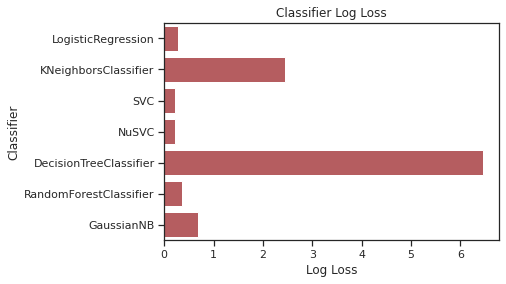

In [ ]:
#sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

#sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="r")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [ ]:
clf = SVC(kernel="rbf", C=0.025, probability=True)
clf.fit(train_data2, y1)
train_predictions = clf.predict(test_data1)
acc = accuracy_score(test_y1, train_predictions)
print(acc)

0.9976076555023924


In [ ]:
df = pd.DataFrame(list(zip(p_id, train_predictions)),columns =['PassengerId', 'Survived']) 

In [ ]:
df.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1